<a href="https://colab.research.google.com/github/Ujjwalb2/investx/blob/main/neuralprophet_with_multifeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code wont be running as the model is incapble of using multiple features at ones ,, waiting to change its documentation

In [1]:
pip install torch==2.1.0


In [2]:
pip install fastapi kaleido python-multipart uvicorn


In [3]:
pip install pandas==1.5.3


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 1.0.0rc5 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [4]:
!pip3 install git+https://github.com/ourownstory/neural_prophet.git

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-bve7cts3
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-bve7cts3
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 305de42ca6a69447a7055b94813394745dc55a9d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.2 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-c

# IMPORTING LIBRARY

In [5]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Defineing the stock dataframe

In [6]:
stock_symbol = 'GOOGL' #Samsung
start_date = '2015-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock_symbol, start = start_date, end=end_date)

print(stock_data.head())
stock_data.to_csv('stock_data.csv')

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  26.629999  26.790001  26.393999  26.477501  26.477501  26480000
2015-01-05  26.357500  26.399500  25.887501  25.973000  25.973000  41182000
2015-01-06  26.025000  26.060499  25.277500  25.332001  25.332001  54456000
2015-01-07  25.547501  25.574499  25.182501  25.257500  25.257500  46918000
2015-01-08  25.075500  25.375000  24.750999  25.345501  25.345501  73054000


In [26]:
stocks = pd.read_csv('stock_data.csv')
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']



In [35]:
pip install ta

In [36]:
import ta
from sklearn.preprocessing import StandardScaler

In [37]:
stocks['EMA_9'] = ta.trend.ema_indicator(stocks['y'], window=9)
stocks['EMA_20'] = ta.trend.ema_indicator(stocks['y'], window=20)
stocks['EMA_55'] = ta.trend.ema_indicator(stocks['y'], window=55)
stocks['EMA_144'] = ta.trend.ema_indicator(stocks['y'], window=144)


In [38]:
stocks['RSI'] = ta.momentum.rsi(stocks['y'], window=14)

In [39]:
stocks

,ds,y,RSI,EMA_9,EMA_20,EMA_55,EMA_144
0,2015-01-02,26.477501,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,25.973000,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,25.332001,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,25.257500,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,25.345501,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009,2022-12-23,89.230003,40.009451,90.409049,92.543015,95.945915,104.177074
2010,2022-12-27,87.389999,36.714162,89.805239,92.052251,95.640347,103.945528
2011,2022-12-28,86.019997,34.439705,89.048191,91.477751,95.296763,103.698279
2012,2022-12-29,88.449997,41.376879,88.928552,91.189393,95.052235,103.487958


In [40]:
# scaler = StandardScaler()
# scaler = scaler.fit(stocks['ds'])
# df_for_training_scaled = scaler.transform(stocks['ds''])

In [41]:
stocks

,ds,y,RSI,EMA_9,EMA_20,EMA_55,EMA_144
0,2015-01-02,26.477501,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,25.973000,NaN,NaN,NaN,NaN,NaN
2,2015-01-06,25.332001,NaN,NaN,NaN,NaN,NaN
3,2015-01-07,25.257500,NaN,NaN,NaN,NaN,NaN
4,2015-01-08,25.345501,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2009,2022-12-23,89.230003,40.009451,90.409049,92.543015,95.945915,104.177074
2010,2022-12-27,87.389999,36.714162,89.805239,92.052251,95.640347,103.945528
2011,2022-12-28,86.019997,34.439705,89.048191,91.477751,95.296763,103.698279
2012,2022-12-29,88.449997,41.376879,88.928552,91.189393,95.052235,103.487958


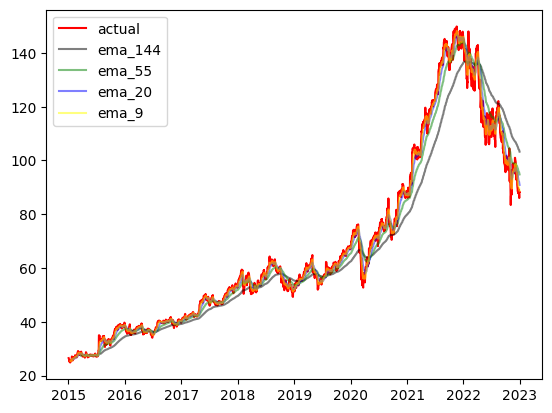

In [66]:
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'red',alpha=1)
plt.plot(stocks['ds'], stocks['EMA_144'], label = 'ema_144', c = 'black',alpha=0.5)
plt.plot(stocks['ds'], stocks['EMA_55'], label = 'ema_55', c = 'green',alpha=0.5)
plt.plot(stocks['ds'], stocks['EMA_20'], label = 'ema_20', c = 'blue',alpha=0.5)
plt.plot(stocks['ds'], stocks['EMA_9'], label = 'ema_9', c = 'yellow', alpha=0.5)
plt.legend()
plt.show()

In [68]:
stocks.dropna(inplace=True)

In [71]:
stocks = stocks.reset_index(drop=True)


In [72]:
stocks

,ds,y,RSI,EMA_9,EMA_20,EMA_55,EMA_144
0,2015-07-29,33.071499,67.457278,32.784827,31.381289,29.410195,28.139936
1,2015-07-30,33.228001,68.202998,32.873461,31.557167,29.546545,28.210116
2,2015-07-31,32.875000,64.606823,32.873769,31.682675,29.665419,28.274460
3,2015-08-03,33.236000,66.549313,32.946215,31.830610,29.792940,28.342895
4,2015-08-04,33.063999,64.726552,32.969772,31.948076,29.909763,28.408013
...,...,...,...,...,...,...,...
1866,2022-12-23,89.230003,40.009451,90.409049,92.543015,95.945915,104.177074
1867,2022-12-27,87.389999,36.714162,89.805239,92.052251,95.640347,103.945528
1868,2022-12-28,86.019997,34.439705,89.048191,91.477751,95.296763,103.698279
1869,2022-12-29,88.449997,41.376879,88.928552,91.189393,95.052235,103.487958


In [75]:
model = NeuralProphet()
model.add_regressor('EMA_9')
model.add_regressor('EMA_20')
model.add_regressor('EMA_55')
model.add_regressor('EMA_144')
model.add_regressor('RSI')


AttributeError: 'NeuralProphet' object has no attribute 'add_regressor'

In [57]:
future = model.make_future_dataframe(stocks, periods = 300)

forecast = model.predict(future)
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = "prediction_Actual", c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c = 'b',)
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.legend()
plt.title('Google')
plt.show()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.375% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 96.375% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralpr

ValueError: Unexpected column RSI in data

In [10]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh